In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('csv/data.csv')
df[:100]

,Unnamed: 0,word,lemma,pos_tag,freq
0,0,ამ,ეს,Pron,1041654
1,1,ზამთრის,ზამთარი,N,8035
2,2,მიწურულს,მიწურული,Dat,5976
3,3,თითქმის,თითქმის,Adv,62608
4,4,სასოწარკვეთილი,სასოწარკვეთილი,A,844
...,...,...,...,...,...
95,105,შუბლზე,შუბლი,N,1697
96,106,ვაკოცე,კოცნა,V,174
97,107,როგორც,როგორც,Cj,478016
98,108,ჩანს,*ჩენა,V,57172


In [32]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარი,N,8035
2,მიწურულს,მიწურული,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844
...,...,...,...,...
1366987,რედაქტორებამდე,რედაქტორი,N,1
1366988,წაეჩხუბებით,წაჩხუბი,V,1
1366989,აგვწონეს,აწონა,V,1
1366990,ტორონჯაძისა,ტორონჯაძე,N,1


In [40]:
suffix_lemmas = set(df[df['lemma'].str.startswith('*')].lemma)
len(suffix_lemmas)

1835

In [48]:
df[df['lemma'].str.startswith('*')]

,word,lemma,pos_tag,freq
41,ქორწინდებიან,*ქორწინება,V,89
51,ვიცნობთ,*ცნობა,V,1052
64,გრჩებოდა,*რჩენა,V,4
98,ჩანს,*ჩენა,V,57172
139,ვიგონებ,*გონება,V,389
...,...,...,...,...
1366937,ვზრდიდითო,*ზრდა,V,1
1366946,ვაქორწინოთ,*ქორწინება,V,1
1366961,უნახონ,*ნახვა,V,1
1366966,ვიყიდით-თქო,*ყიდვა,V,1


In [55]:
df[df['lemma'] == '*ცნობა'].sort_values(by='freq', ascending=False)

,word,lemma,pos_tag,freq
13009,იცნობს,*ცნობა,V,5723
500,ვიცნობ,*ცნობა,V,5222
1510,იცნობდა,*ცნობა,V,2674
27954,იცნობენ,*ცნობა,V,2372
75957,ცნობს,*ცნობა,V,2344
...,...,...,...,...
749996,იცნობდის,*ცნობა,V,1
831879,გვიცნობდით,*ცნობა,V,1
980045,ვიცნობ-თქო,*ცნობა,V,1
989852,სცნობენო,*ცნობა,V,1


In [42]:
variants = {}
for lemma in suffix_lemmas:
    variants[lemma] = df.lemma[df.lemma.str.endswith(lemma)]

KeyboardInterrupt: 

In [49]:
df.lemma[df.lemma.str.endswith('ჩენა')].value_counts()

lemma
გადარჩენა        474
გაჩენა           445
გამოჩენა         409
დარჩენა          390
აღმოჩენა         370
მორჩენა          252
*ჩენა            234
შერჩენა          228
*რჩენა           152
წარმოჩენა        152
ჩამორჩენა        150
მიჩენა           137
გამორჩენა        129
ჩენა             112
რჩენა             80
ჩარჩენა           78
შემორჩენა         72
მოჩენა            70
დაჩენა            65
აჩენა             47
შეჩენა            42
გადრჩენა          36
შემოჩენა          29
ამოჩენა           29
დაფჩენა           23
აღჩენა            20
თვითგადარჩენა     15
მირჩენა           14
გარჩენა           14
განჩენა           13
გარდარჩენა        11
არჩენა             8
წამოჩენა           8
თავგამოჩენა        7
არგამოჩენა         7
არდარჩენა          3
გარდრჩენა          2
არდაჩენა           2
ჯერება-ჩენა        2
არგადარჩენა        2
არგაჩენა           2
ჩაჩენა             1
არმოჩენა           1
სათნოჩენა          1
ძალობა-ჩენა        1
არჩარჩენა          1
არმორჩენა          1
არგამორ

In [4]:
df.query("word == 'თქმა'")

,word,lemma,pos_tag,freq
2975,თქმა,თქმა,<MWE>,82436


In [5]:
df.query("pos_tag.str.startswith('PP')")

,word,lemma,pos_tag,freq
6122,ვისთან,ვინ,PP,3150
20076,თავისთან,თავისი,PP,1383
86004,ვისთანმე,ვინ,PP,22
101275,თავისთანაც,თავისი,PP,10
113210,უფროსებში,უფროსი,PP,281
127798,მანანასთან,მანანა,PP,31
132171,უფროსებთან,უფროსი,PP,249
164777,უფროსებზე,უფროსი,PP,42
569069,დელისთან,დელისი,PP,52
613901,აღარავისთან,აღარავინ,PP,13


In [6]:
junk = ['Foreign', 'Unknown', '>XCOMP', 'Symbol', 'Guess', '<MWE>', 'X', 'Punct']
# SG -> a LOT. PL -> a LOT.
df.query("pos_tag == 'Rel:ც'")

,word,lemma,pos_tag,freq
74610,ურომლისოდაც,ურომლისოდაც,Rel:ც,454


In [7]:
df.groupby(by='pos_tag').pos_tag.count()

pos_tag
<MWE>              190
A               195869
Abs                  2
Adv               6167
Advb              1113
Att                122
Cj                 289
Compl                8
Dat               3221
Dialect             22
Encl:Aux           115
Encl:IndSp1         47
Encl:IndSp2         13
Encl:IndSp3        313
Encl:ვე             33
Encl:კი              5
Encl:მე              7
Encl:ღა             24
Encl:ც             206
Erg               1043
Foc                205
Gen               1066
Hum               1803
Imp                  1
Inst               566
Int                 14
Interj             882
L                  171
LevGuess            35
Modal                5
N               729021
Neg                  5
Nom               4400
NonStand            40
Num               4892
Old                225
PP                  13
Pl                 314
Pot                  2
Pp                 213
Pron              4047
Prop               426
Pv                1281
Qua

In [8]:
main_pos = ['N', 'V', 'Adv', 'A', 'Num', 'Pron', 'Cj', 'Interj', 'Pp']

In [9]:
def convert(tag):
    try:
        return {"Nom":"N", "Dat":"N", "Gen":"N", "Erg":"N", "Voc":"N", "Inst":"N", "Foc":"Adv", "Att": 'Adv', "Pv": "V"}[tag]
    except KeyError:
        if tag in main_pos:
            return tag
        return 'Other'

df.pos_tag = df.pos_tag.agg(convert)

<Axes: xlabel='word', ylabel='pos_tag'>

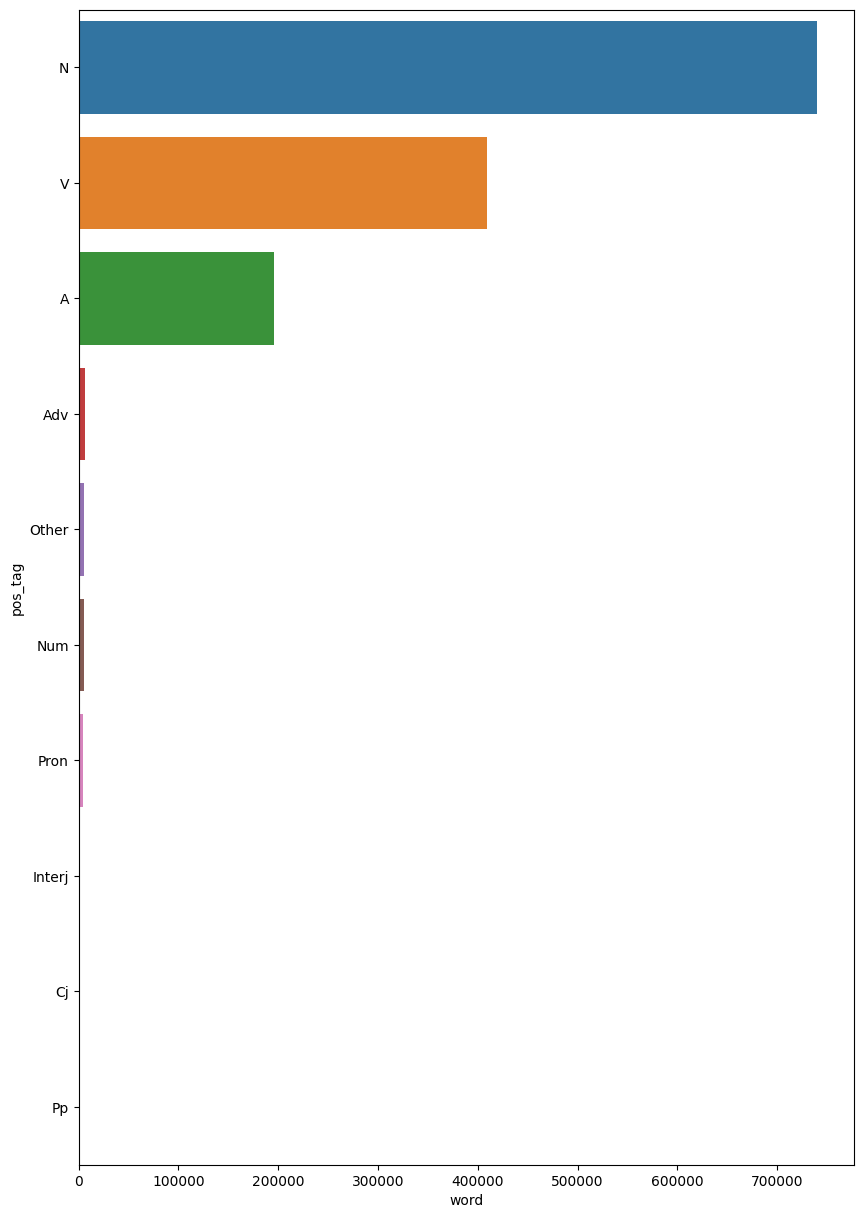

In [10]:
plt.figure(figsize=(10, 15))
sns.barplot(data=df.groupby(by="pos_tag")["word"].count().reset_index().sort_values(by="word", ascending=False), y="pos_tag", x="word")

## სიტყვის სიგრძეები

In [11]:
df['word_length'] = df.word.str.len()
df['lemma_length'] = df.lemma.str.len()
df['ratio'] = df['word_length'] / df['lemma_length']
df[['word', 'ratio', 'word_length', 'lemma_length']]

,word,ratio,word_length,lemma_length
0,ამ,1.000000,2,2
1,ზამთრის,1.000000,7,7
2,მიწურულს,1.000000,8,8
3,თითქმის,1.000000,7,7
4,სასოწარკვეთილი,1.000000,14,14
...,...,...,...,...
1366987,რედაქტორებამდე,1.555556,14,9
1366988,წაეჩხუბებით,1.571429,11,7
1366989,აგვწონეს,1.600000,8,5
1366990,ტორონჯაძისა,1.222222,11,9


max: 36, min: 1


<Axes: xlabel='lemma_length', ylabel='count'>

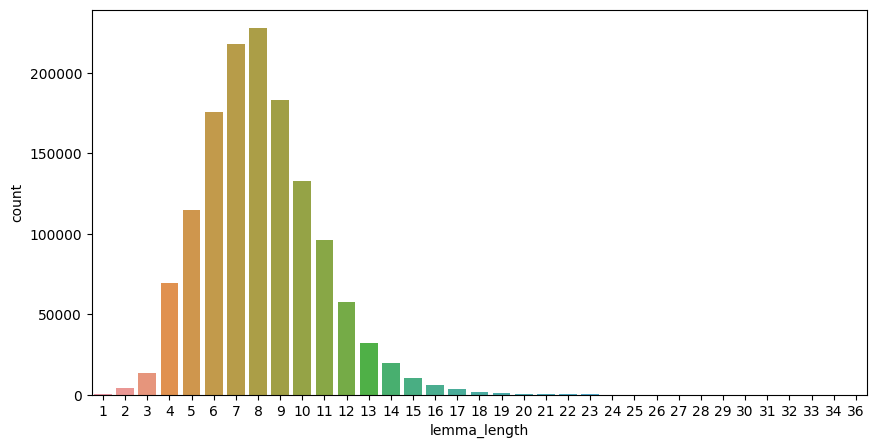

In [12]:
print(f'max: {df["lemma_length"].max()}, min: {df["lemma_length"].min()}')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='lemma_length')

In [13]:
df.lemma_length.quantile(q=[ i / 100 for i in range(1, 100)])

0.01     3.0
0.02     4.0
0.03     4.0
0.04     4.0
0.05     4.0
        ... 
0.95    13.0
0.96    13.0
0.97    14.0
0.98    14.0
0.99    15.0
Name: lemma_length, Length: 99, dtype: float64

In [14]:
df['lemma_length_category'] = pd.qcut(df.lemma_length, [0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])

max: 32, min: 1


<Axes: xlabel='word_length', ylabel='count'>

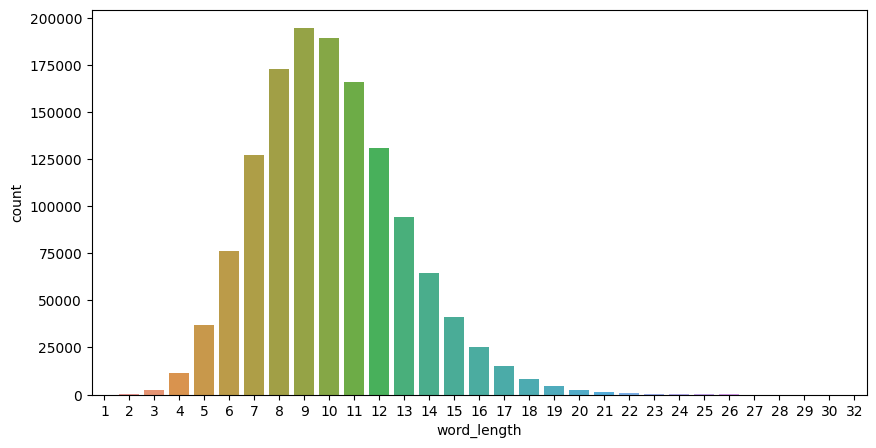

In [15]:
print(f'max: {df["word_length"].max()}, min: {df["word_length"].min()}')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='word_length')

In [16]:
df['word_length_category'] = pd.qcut(df.word_length, [0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])

Text(0.5, 0, '')

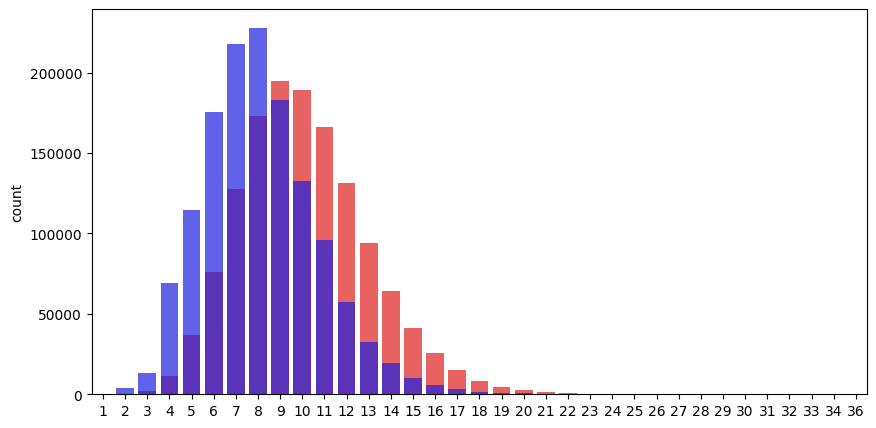

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='word_length', color='red', alpha=0.7)
sns.countplot(data=df, x='lemma_length', color='blue', alpha=0.7)
plt.xlabel("")

max: 11.0, min: 0.2


<Axes: xlabel='ratio', ylabel='Count'>

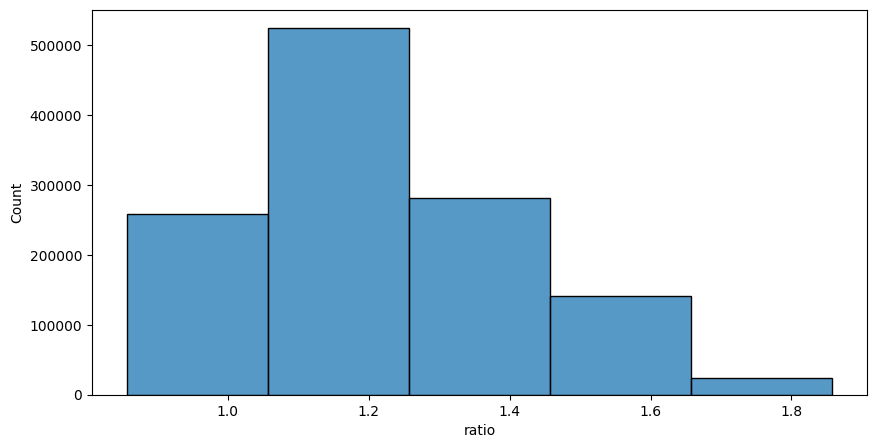

In [18]:
print(f'max: {df["ratio"].max()}, min: {df["ratio"].min()}')
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df.ratio.between(*list(df.ratio.quantile([.01, .9])))], x='ratio', binwidth=0.2, stat='count')

In [19]:
df['ratio'].quantile()

1.2

In [20]:
conditions = [
    df['ratio'] < 1,
    df['ratio'] == 1,
    df['ratio'] > 1
]
choices = ['less', 'equal', 'greater']
df['ratio_category'] = np.select(conditions, choices)

<Axes: xlabel='ratio_category', ylabel='count'>

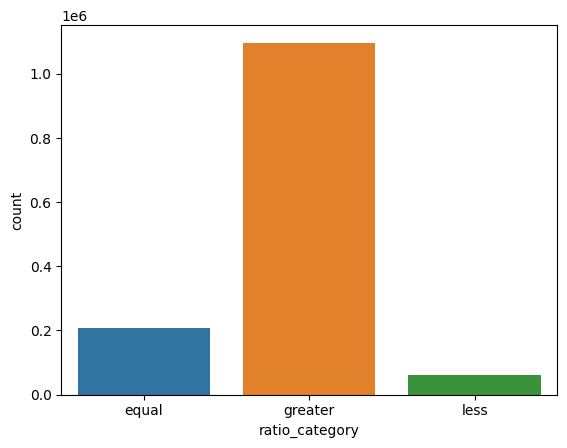

In [21]:
sns.countplot(df, x='ratio_category')

In [22]:
df.query('ratio_category == "greater"')

,word,lemma,pos_tag,freq,word_length,lemma_length,ratio,lemma_length_category,word_length_category,ratio_category
5,გახლდით,ხლება,V,1689,7,5,1.400000,low,low,greater
7,ხანია,ხანი,N,24507,5,4,1.250000,low,low,greater
10,ქალიშვილის,ქალიშვილი,N,1485,10,9,1.111111,medium,medium,greater
11,რახელის,რახელ,N,39,7,5,1.400000,low,low,greater
12,ამხანაგები,ამხანაგი,N,503,10,8,1.250000,medium,medium,greater
...,...,...,...,...,...,...,...,...,...,...
1366987,რედაქტორებამდე,რედაქტორი,N,1,14,9,1.555556,medium,high,greater
1366988,წაეჩხუბებით,წაჩხუბი,V,1,11,7,1.571429,low,medium,greater
1366989,აგვწონეს,აწონა,V,1,8,5,1.600000,low,low,greater
1366990,ტორონჯაძისა,ტორონჯაძე,N,1,11,9,1.222222,medium,medium,greater


## სხვათა სიტყვათა ფორმები

In [23]:
reported_speech_candidates = df[df.word.str.endswith('ო')].copy()
reported_speech_candidates['word'] = reported_speech_candidates.word.str[:-1]
reported_speech_candidates = reported_speech_candidates[reported_speech_candidates.word.isin(df.word)]
third_person_reported_speech = df.index.isin(reported_speech_candidates[reported_speech_candidates.word.isin(pd.merge(reported_speech_candidates, df, on=['word', 'lemma', 'pos_tag'], how='inner').word)].index)

df['reported_speech'] = df.word.str.endswith(('-მეთქი', '-თქო')) | third_person_reported_speech

In [24]:
df['reported_speech'] = df['reported_speech'].astype('str')

In [25]:
df.groupby(by='reported_speech').word.count()

reported_speech
False    1278493
True       88499
Name: word, dtype: int64

<Axes: xlabel='reported_speech', ylabel='count'>

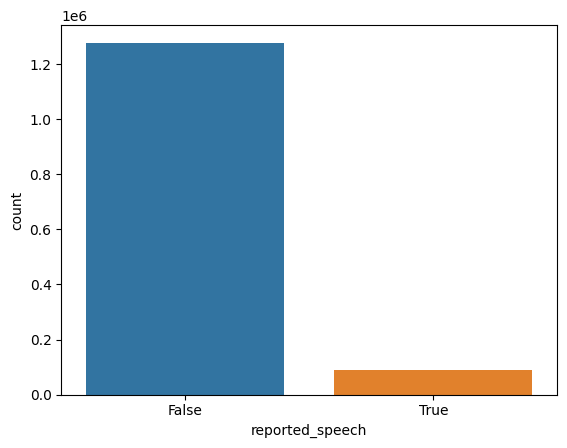

In [26]:
sns.countplot(data=df, x='reported_speech')

## სიხშირეები

In [27]:
df.freq.quantile(q=[ i / 100 for i in range(1, 100)])

0.01       1.0
0.02       1.0
0.03       1.0
0.04       1.0
0.05       1.0
         ...  
0.95     145.0
0.96     202.0
0.97     302.0
0.98     521.0
0.99    1229.0
Name: freq, Length: 99, dtype: float64

In [28]:
df.query('freq > 100').shape[0]

87009

In [29]:
df['freq_category'] = pd.qcut(df.freq, [0, 0.5, 0.9, 1], labels=['low', 'medium', 'high'])

In [30]:
df.groupby(by='freq_category').freq.mean()

freq_category
low          1.273672
medium      11.237068
high      1058.306617
Name: freq, dtype: float64

<Axes: xlabel='freq_category', ylabel='count'>

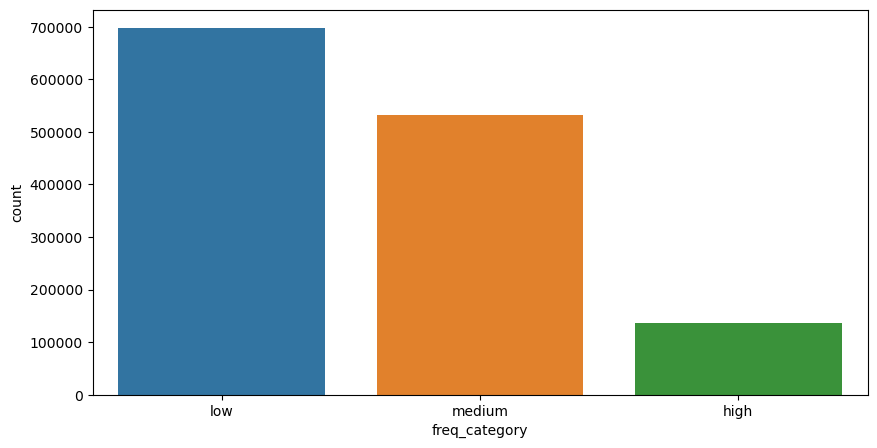

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='freq_category')

In [32]:
df.head()

,word,lemma,pos_tag,freq,word_length,lemma_length,ratio,lemma_length_category,word_length_category,ratio_category,reported_speech,freq_category
0,ამ,ეს,Pron,1041654,2,2,1.0,low,low,equal,False,high
1,ზამთრის,ზამთარი,N,8035,7,7,1.0,low,low,equal,False,high
2,მიწურულს,მიწურული,N,5976,8,8,1.0,medium,low,equal,False,high
3,თითქმის,თითქმის,Adv,62608,7,7,1.0,low,low,equal,False,high
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844,14,14,1.0,high,high,equal,False,high


## ტრეინ / ტესტ დაყოფა

In [33]:
categories = ['pos_tag', 'freq_category', 'ratio_category', 'reported_speech', 'word_length_category', 'lemma_length_category']
classes = df[['pos_tag']]

In [34]:
df.groupby(by=categories).word.count()

pos_tag  freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
A        low            equal           False            low                   low                      3364
                                                                               medium                   6239
                                                                               high                        0
                                                         medium                low                         0
                                                                               medium                      0
                                                                                                        ... 
V        high           less            True             medium                medium                      0
                                                                               high                        0
                           

In [35]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=classes, random_state=42)

In [36]:
train_dist = train_df.groupby(by=categories[1:]).word.count() / train_df.word.count()
train_dist

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      0.015662
                                                                      medium                   0.018085
                                                                      high                     0.000000
                                                medium                low                      0.000000
                                                                      medium                   0.000000
                                                                                                 ...   
high           less            True             medium                medium                   0.000000
                                                                      high                     0.000000
                                                high                  low   

In [37]:
test_dist = test_df.groupby(by=categories[1:]).word.count() / test_df.word.count()
test_dist

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      0.015389
                                                                      medium                   0.017679
                                                                      high                     0.000000
                                                medium                low                      0.000000
                                                                      medium                   0.000000
                                                                                                 ...   
high           less            True             medium                medium                   0.000000
                                                                      high                     0.000000
                                                high                  low   

In [38]:
test_dist /  train_dist  # კატეგორიებში განაწილებების შეფარდებები

freq_category  ratio_category  reported_speech  word_length_category  lemma_length_category
low            equal           False            low                   low                      0.982561
                                                                      medium                   0.977558
                                                                      high                          NaN
                                                medium                low                           NaN
                                                                      medium                        NaN
                                                                                                 ...   
high           less            True             medium                medium                        NaN
                                                                      high                          NaN
                                                high                  low   

In [39]:
train_set_lemmas = set(train_df.lemma.unique())
test_set_lemmas = set(test_df.lemma.unique())

In [40]:
not_in_test = train_set_lemmas - test_set_lemmas
not_in_train = test_set_lemmas - train_set_lemmas
print(f'Number of lemmas in test set not present in train set: {len(not_in_train)}')
print(f'Number of lemmas in train set not present in test set: {len(not_in_test)}')

Number of lemmas in test set not present in train set: 13281
Number of lemmas in train set not present in test set: 43314


In [41]:
train_df.to_csv('csv/train.csv')
test_df.to_csv('csv/test.csv')